## Tips Dataframe

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

### Description

In [2]:
df=pd.read_csv("tips.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (244, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df = df.rename(columns={'total_bill': 'Bill', 'tip':'Tip', 'sex':'Gender', 'smoker':'Smoker', 'day':'Day','time':'Time', 'size': 'Party'})
df.head()

,Bill,Tip,Gender,Smoker,Day,Time,Party
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,Bill,Tip,Party
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


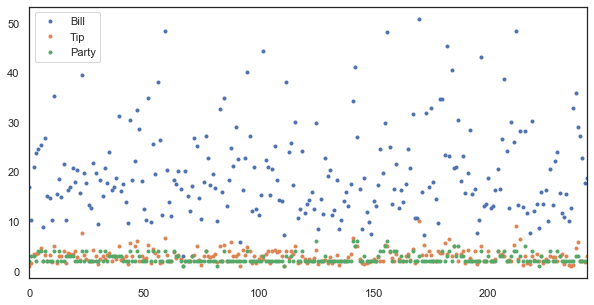

In [7]:
df.plot(style = "o", ms=3, figsize = [10,5])
plt.show()
#Ref1: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
#Ref2:http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/

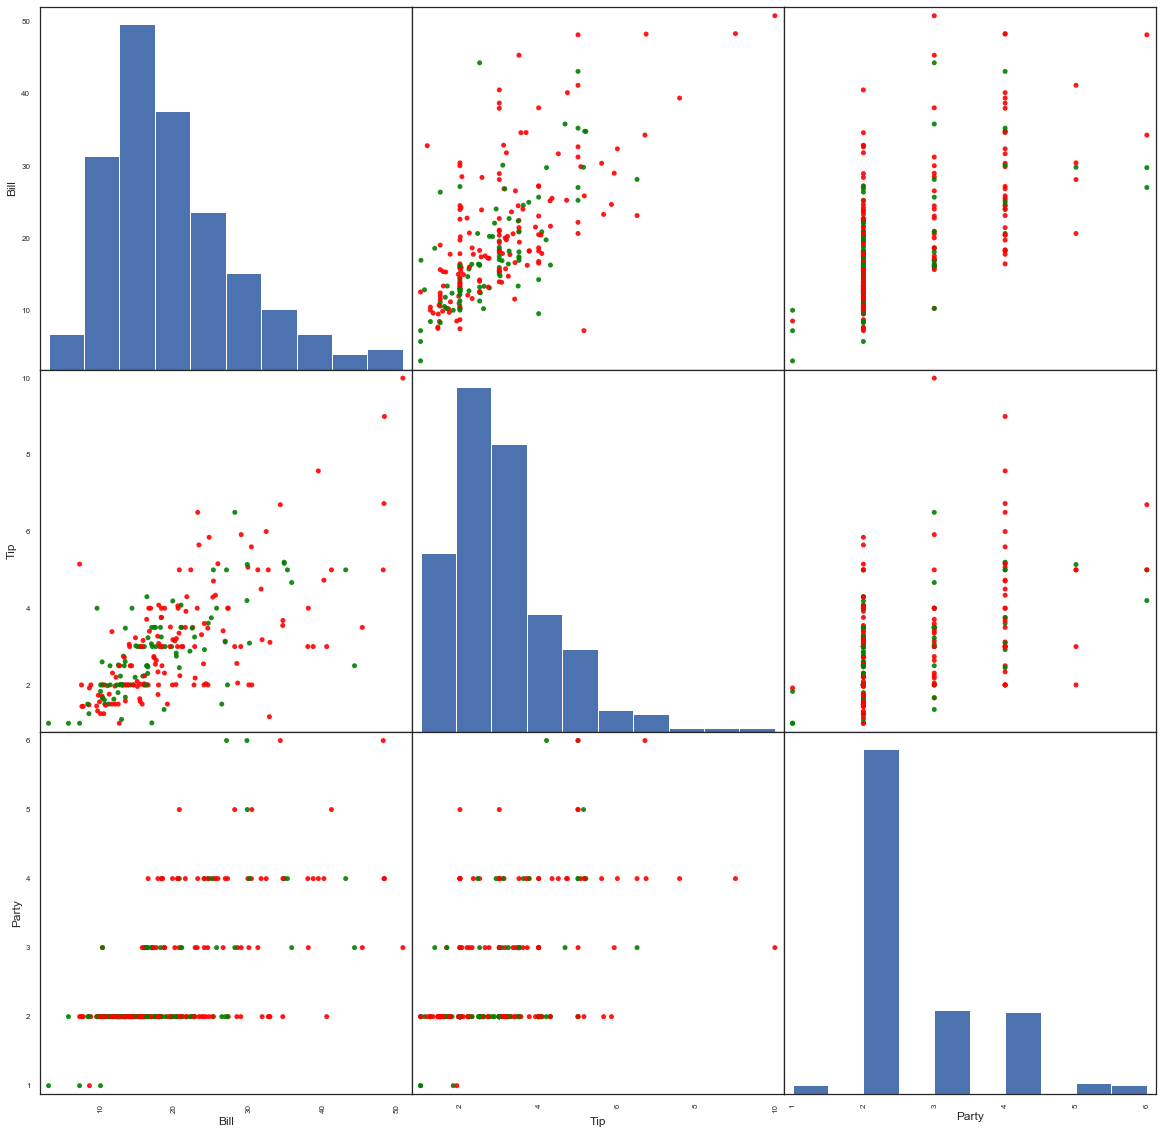

In [8]:
color_list = ['red' if i=='Male' else 'green' for i in df.loc[:,'Gender']]

pd.plotting.scatter_matrix(df, alpha=0.9, c = color_list, figsize = [20,20],
            diagonal = 'hist', s = 100, marker = '.')
plt.show()

Text(0, 0.5, 'Tip Amount')

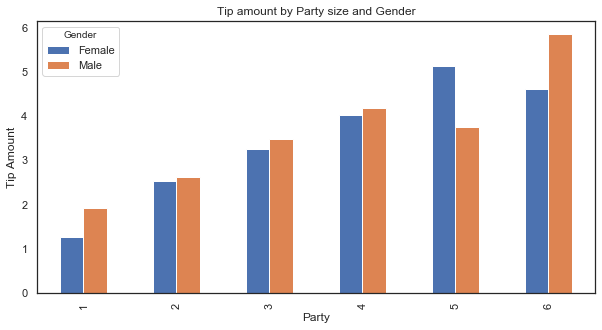

In [9]:
df.groupby(['Gender', 'Party'])['Tip'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.title('Tip amount by Party size and Gender')
plt.ylabel('Tip Amount')

In [10]:
df['Tippc']=df.apply(lambda row: row.Tip / row.Bill, axis=1)
# Ref: https://kaijento.github.io/2017/04/22/pandas-create-new-column-sum/
# Tippc is the percent of the tip relative to the Bill

In [11]:
df.head()

,Bill,Tip,Gender,Smoker,Day,Time,Party,Tippc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Text(0, 0.5, 'Tip Amount as a percentage of the Bill')

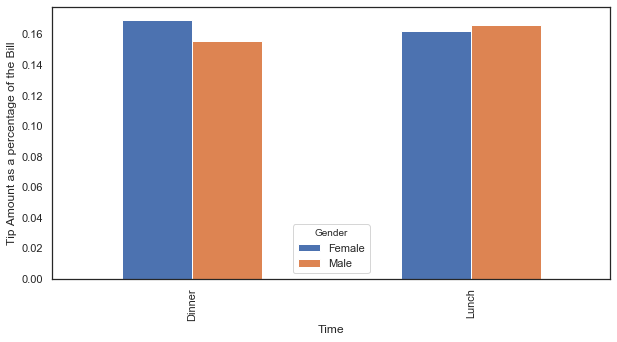

In [12]:
df.groupby(['Gender', 'Time'])['Tippc'].mean().unstack(level=0).plot(kind='bar', figsize=(10,5))
plt.ylabel('Tip Amount as a percentage of the Bill')

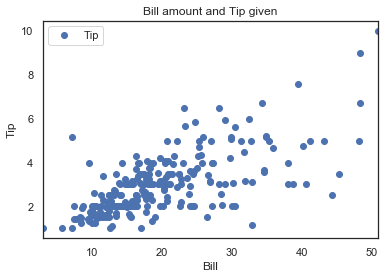

In [13]:
df.plot(x='Bill', y='Tip', style='o')  
plt.title('Bill amount and Tip given')  
plt.xlabel('Bill')  
plt.ylabel('Tip')  
plt.show()

- Looking at where the dots are concentrated, 

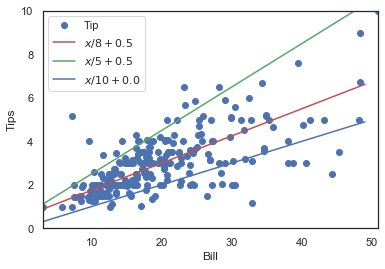

In [14]:
# Plot w versus d with black dots.
df.plot(x='Bill', y='Tip', style='o')

# Overlay some lines on the plot.
x = np.arange(0.0, 50.0, 1.0)
plt.plot(x, 0.125 * x + 0.5, 'r-', label=r"$x/8 + 0.5$")
plt.plot(x, 0.2 * x +  0.5, 'g-', label=r"$x/5 +  0.5$")
plt.plot(x, 0.1 * x + 0.0, 'b-', label=r"$x/10 + 0.0$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Bill')
plt.ylabel('Tips')
# Adjust the plot range
plt.ylim(0, 10)
# Show the plot.
plt.show()

In [15]:
B = df["Bill"]
T = df["Tip"]

cost = lambda m,c: np.sum([(T[i] - m * B[i] - c)**2 for i in range(B.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.125, 0.5, cost(0.125, 0.5)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.2,  0.5, cost(0.2,  0.5)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 0.0, cost(0.1, 0.0)))

Cost with m =  0.12 and c =  0.50:   260.63
Cost with m =  0.20 and c =  0.50:   945.84
Cost with m =  0.10 and c =  0.00:   506.98


In [16]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb
# Calculate the best values for m and c.

B = df["Bill"]
T = df["Tip"]

# Calculate the best values for B and T.
B_avg = df["Bill"].mean()
T_avg = df["Tip"].mean()

B_zero = B - B_avg
T_zero = T - T_avg

m = np.sum(B_zero * T_zero) / np.sum(T_zero * B_zero)
c = T_avg - m * B_avg

print ("m is %8.6f and c is %6.6f." % (m, c))


x, y, x_avg, y_avg = B, T, B_avg, T_avg
m2 = (np.sum(x * y) - y_avg * np.sum(x)) / (np.sum(x * x) - x_avg * np.sum(x))
c2 = y_avg - m2 * x_avg
m2, c2

m is 1.000000 and c is -16.787664.


(0.10502451738435345, 0.9202696135546717)

In [18]:
np.polyfit(B, T, 1)

array([0.10502452, 0.92026961])

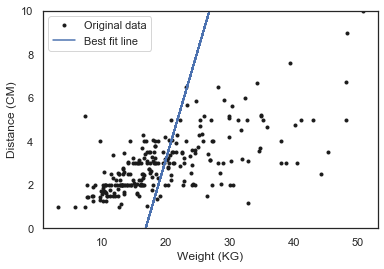

In [20]:
# Plot the best fit line.
plt.plot(B, T, 'k.', label='Original data')
plt.plot(B, m * B + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

plt.ylim(0, 10)
# Show the plot.
plt.show()

In [17]:
#df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
#df['Smoker'] = df['Smoker'].map({'No': 1, 'Yes': 2})
#df['Time'] = df['Time'].map({'Lunch': 1, 'Dinner': 2})
#df['Day'] = df['Day'].map({'Sun': 1, 'Mon': 2, 'Tue' : 3, 'Wed' : 4, 'Thu' : 5, 'Fri': 6, 'Sat': 7 })